## Tarea Semanal Nro 5 | Ancho de banda de señales reales

#### **Introducción y fundamentos teóricos**

##### *Propuesta*

Se pide:

**1)** Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey).

**2)** Realice una estimación del ancho de banda de cada señal y presente los resultados en un tabla para facilitar la comparación.

**Bonus:**

💎 Proponga algún tipo de señal que no haya sido analizada y repita el análisis. No olvide explicar su origen y cómo fue digitalizada.

##### *Un poco de teoría*

En este trabajo, se realiza la estimación de la densidad espectral de potencia (PSD, por sus siglas en inglés) de varias señales BOLD utilizando métodos clásicos de estimación espectral.

**Periodograma Ventaneado**: Este método implica aplicar una ventana sobre la señal antes de calcular la transformada de Fourier. El periodograma es la estimación de la PSD sin un suavizado, y al aplicar una ventana, se mitigan algunos efectos del desparramo espectral.

**Método de Welch**: Es una mejora del periodograma, que divide la señal en segmentos solapados, calcula la PSD para cada segmento, y luego promedia los resultados. Este enfoque reduce la varianza de la estimación de la PSD, lo que lo convierte en un método robusto y comúnmente utilizado en el análisis espectral.

**Método Blackman-Tukey**: Este método utiliza una estimación más suave de la PSD al aplicar una autocorrelación de la señal y un suavizado de la función de autocorrelación mediante una ventana. Esto mejora la precisión de la estimación espectral, especialmente cuando se enfrentan a señales con alta variabilidad.

Una vez obtenida la PSD de cada señal, se realiza una **estimación del ancho de banda**. El ancho de banda de una señal se define como el rango de frecuencias en el que se concentra la mayor parte de la energía de la señal. En términos prácticos, el ancho de banda se puede calcular como el intervalo de frecuencias donde la PSD alcanza un cierto porcentaje (por ejemplo, el 95%) de su valor máximo. Este parámetro es importante porque nos da una idea de la "anchura" de la distribución de frecuencias de la señal, lo cual es útil para caracterizar su comportamiento dinámico.



In [1]:

############ IMPORTAR LIBRERIAS ############
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io as sio
import pandas as pd

In [2]:

######### DEFINICION DE FUNCIONES #########

def blackman_tukey(x, fs, M=None):
    x = x.flatten()
    N = len(x)
    if M is None:
        M = N // 5

    r_len = 2 * M - 1
    xx = x[:r_len]
    r = np.correlate(xx, xx, mode='same') / r_len
    ventana = sig.windows.blackman(r_len)
    psd = np.abs(np.fft.fft(r * ventana, n=N))
    psd = psd[:N // 2]
    freqs = np.linspace(0, fs, N, endpoint=False)[:N // 2]
    return freqs, psd


def graficar_densidad_espectral(fs, N, periodogram, ff_pm, pm, ff_welch, welch, ff_bt, bt, titulo):
    eps = 1e-12  # Para evitar log(0)

    plt.figure(figsize=(10, 6))
    plt.suptitle(f'Densidad espectral de potencia - {titulo} (en dB)')

    plt.subplot(2, 2, 1)
    plt.plot(np.linspace(0, fs, N, endpoint=False)[:N // 2], 10 * np.log10(periodogram[:N // 2] + eps))
    plt.title('Periodograma estándar')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(ff_pm, 10 * np.log10(pm + eps))
    plt.title('Periodograma ventaneado (Flattop)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(ff_welch, 10 * np.log10(welch + eps))
    plt.title('Método de Welch')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.plot(ff_bt, 10 * np.log10(bt+ eps))
    plt.title('Método de Blackman-Tukey')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral [dB]')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    

def get_bandwidth_to_percent(freqs, psd, H_percent):
    
    # Paso 1: calcular el área total bajo la curva (integral aproximada)
    delta_f = freqs[1] - freqs[0]
    total_area = np.sum(psd * delta_f)

    # Paso 2: calcular el área acumulada
    accumulated_area = 0
    target_area = total_area * (H_percent / 100)

    for i in range(len(psd)):
        accumulated_area += psd[i] * delta_f
        if accumulated_area >= target_area:
            return i, freqs[i]

    # Si no se alcanzó el porcentaje, devolver el último bin
    return len(psd) - 1, freqs[-1]



In [3]:

######## CARGA DE DATOS ########

# Cargar la señal ECG
fs_ecg = 1000 # Hz
ecg = np.load('ecg_sin_ruido.npy')
ecg = ecg / np.std(ecg) # Normalizar la señal

# Cargar la señal PPG
fs_ppg = 400 # Hz
ppg = np.load('ppg_sin_ruido.npy')
ppg = ppg / np.std(ppg) # Normalizar la señal

# Cargar la señal de audio
fs_audio, audio = sio.wavfile.read('la cucaracha.wav')


#### Carga de las señales

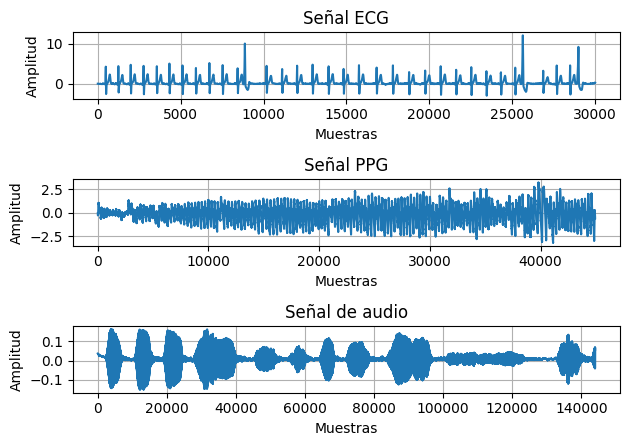

In [4]:

######## GRAFICAR SEÑALES ########
plt.figure()

# Graficar la señal ECG
plt.subplot(3,1, 1)
plt.plot(ecg)
plt.title('Señal ECG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal PPG
plt.subplot(3,1, 2)
plt.plot(ppg)
plt.title('Señal PPG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar la señal de audio
plt.subplot(3,1, 3)
plt.plot(audio)
plt.title('Señal de audio')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])



In [5]:

##### CALCULO DEL PERIODOGRAMA ESTANDAR #######

N_ecg = ecg.shape[0]
df_ecg = fs_ppg / N_ecg
ff_ecg = np.linspace(0, fs_ecg, N_ecg, endpoint=False)
fft_ecg = np.fft.fft(ecg.flatten())
pe_ecg=np.abs(fft_ecg)**2

N_ppg = ppg.shape[0]
df_ppg = fs_ppg / N_ppg
ff_ppg = np.linspace(0, fs_ppg, N_ppg, endpoint=False)
fft_ppg = np.fft.fft(ppg.flatten())
pe_ppg=np.abs(fft_ppg)**2

N_audio = audio.shape[0]
df_audio = fs_audio / N_audio
ff_audio = np.linspace(0, fs_audio, N_audio, endpoint=False)
fft_audio = np.fft.fft(audio.flatten())
pe_audio=np.abs(fft_audio)**2


#### Se verifica el teorema de parceval para cada señal

In [6]:


##### VERIFICAR TEOREMA DE PARESEVAL ######

suma_temp = np.sum(ecg.flatten()**2)
suma_frec = np.sum(pe_ecg) / N_ecg  
print("ECG")
print("Suma de cuadrados en el dominio del tiempo:", suma_temp)
print("Suma de cuadrados en el dominio de la frecuencia:", suma_frec)

suma_temp = np.sum(ppg.flatten()**2)
suma_frec = np.sum(pe_ppg) / N_ppg  
print("PPG")
print("Suma de cuadrados en el dominio del tiempo:", suma_temp)
print("Suma de cuadrados en el dominio de la frecuencia:", suma_frec)

suma_temp = np.sum(audio.flatten()**2)
suma_frec = np.sum(pe_audio) / N_audio 
print("AUDIO")
print("Suma de cuadrados en el dominio del tiempo:", suma_temp)
print("Suma de cuadrados en el dominio de la frecuencia:", suma_frec)


ECG
Suma de cuadrados en el dominio del tiempo: 32462.28695506214
Suma de cuadrados en el dominio de la frecuencia: 32462.286955062144
PPG
Suma de cuadrados en el dominio del tiempo: 45272.75786396239
Suma de cuadrados en el dominio de la frecuencia: 45272.75786396238
AUDIO
Suma de cuadrados en el dominio del tiempo: 272.10394
Suma de cuadrados en el dominio de la frecuencia: 272.10394


#### Se calcula la densidad espectral por diferentes métodos. 

Especificaciones
- Periodograma ventaneado: Se ventanea con Hlattop para mitigar el desparramo espectral
- Welch: Se ventanea con Hann
- Blackman-Tukey: Se aplica mediante la función proporcionada por el profesor, modificada para que también devuelva el vector de las frecuencias. Se configuro un parámetro M=N_audio//10 para reducir la varianza en los resultados

In [7]:

##### CALCULO DEL ESPECTRO CON PERIODOGRAMA VENTANEADO #######

ff_pv_ecg, pv_ecg = sig.periodogram(ecg, fs=fs_ecg, window='flattop', nfft=N_ecg-2, detrend='constant', return_onesided=True, scaling='density', axis=-1)
ff_pv_ppg, pv_ppg = sig.periodogram(ppg, fs=fs_ppg, window='flattop', nfft=N_ppg-2, detrend='constant', return_onesided=True, scaling='density', axis=-1)
ff_pv_audio, pv_audio = sig.periodogram(audio, fs=fs_audio, window='flattop', nfft=N_audio-2, detrend='constant', return_onesided=True, scaling='density', axis=-1)

##### CALCULO DEL ESPECTRO CON WELCH #######

ff_wel_ecg, wel_ecg = sig.welch(ecg, fs=fs_ecg, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
ff_wel_ppg, wel_ppg = sig.welch(ppg, fs=fs_ppg, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
ff_wel_audio, wel_audio = sig.welch(audio, fs=fs_audio, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')

##### CALCULO DEL ESPECTRO CON BLACKMAN - TUKEY #######

ff_bt_ecg, bt_ecg = blackman_tukey(ecg, fs_ecg, M=N_ecg//10)
ff_bt_ppg, bt_ppg = blackman_tukey(ppg, fs_ppg, M=N_ppg//10)
ff_bt_audio, bt_audio = blackman_tukey(audio, fs_audio, M=N_audio//10)



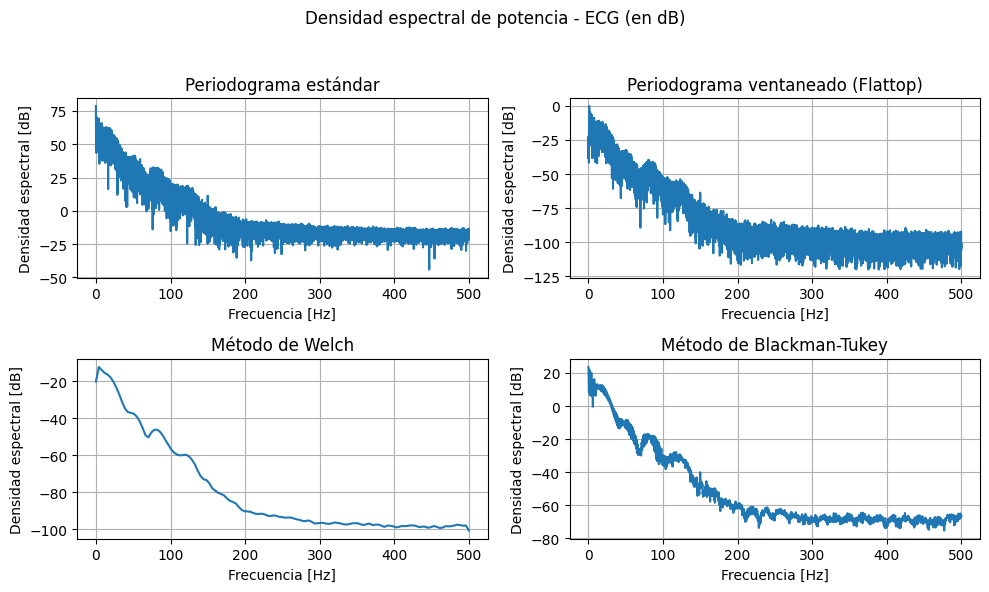

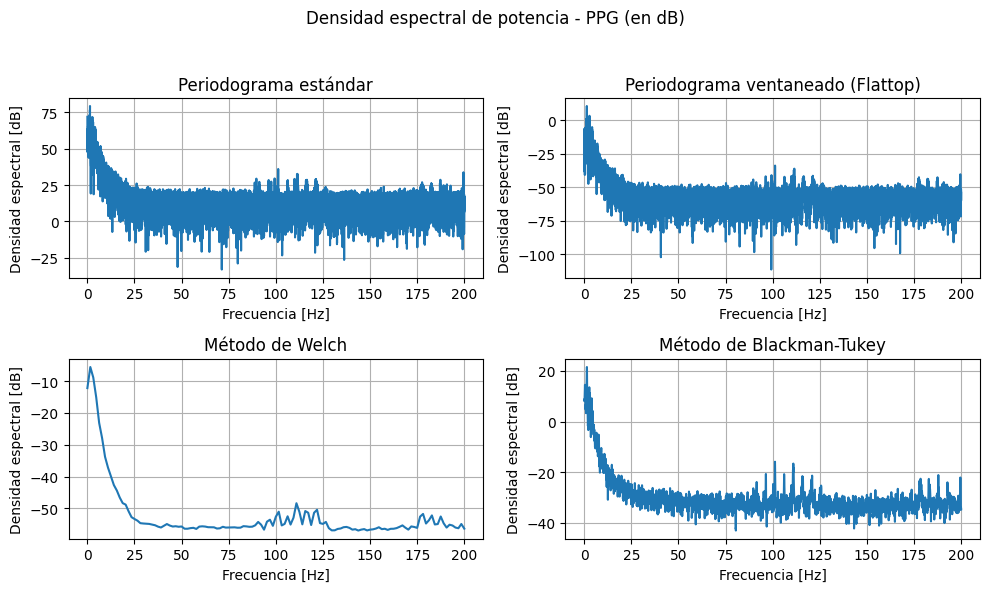

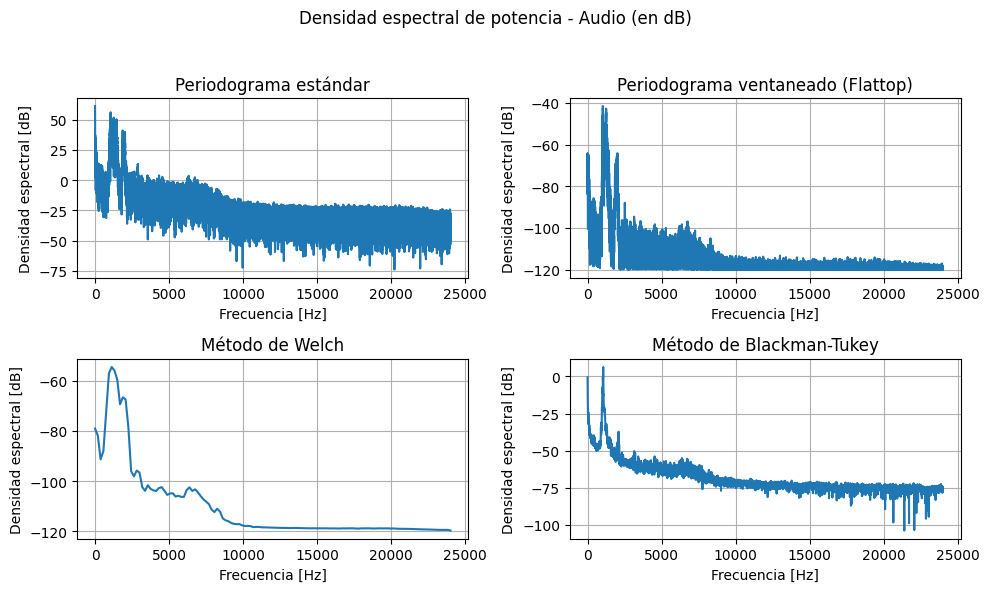

In [8]:
###### GRAFICAR EL ESPECTRO DE LA SEÑAL PPG ######

graficar_densidad_espectral(fs_ecg, N_ecg, pe_ecg, ff_pv_ecg, pv_ecg, ff_wel_ecg, wel_ecg, ff_bt_ecg, bt_ecg, 'ECG')
graficar_densidad_espectral(fs_ppg, N_ppg, pe_ppg, ff_pv_ppg, pv_ppg, ff_wel_ppg, wel_ppg, ff_bt_ppg, bt_ppg, 'PPG')
graficar_densidad_espectral(fs_audio, N_audio, pe_audio, ff_pv_audio, pv_audio, ff_wel_audio, wel_audio, ff_bt_audio, bt_audio, 'Audio')

plt.show()


En los graficos se observa que Welch es por lejos el método de estimación que menor varianza en la estimación genera, luego le sigue Blackman - Tukey y luego Periodograma por ventaneo

#### Cálculo del ancho de banda

In [9]:

######## CALCULO DEL ANCHO DE BANDA CON 95% ########

H_percent = 95  # Porcentaje deseado

idx_fe_ecg, freq_fe_ecg = get_bandwidth_to_percent(ff_ecg, pe_ecg, H_percent)
idx_fv_ecg, freq_fv_ecg = get_bandwidth_to_percent(ff_pv_ecg, pv_ecg, H_percent)
idx_wel_ecg, freq_wel_ecg = get_bandwidth_to_percent(ff_wel_ecg, wel_ecg, H_percent)
idx_bt_ecg, freq_bt_ecg = get_bandwidth_to_percent(ff_bt_ecg, bt_ecg, H_percent)

idx_fe_ppg, freq_fe_ppg = get_bandwidth_to_percent(ff_ppg, pe_ppg, H_percent)
idx_fv_ppg, freq_fv_ppg = get_bandwidth_to_percent(ff_pv_ppg, pv_ppg, H_percent)
idx_wel_ppg, freq_wel_ppg = get_bandwidth_to_percent(ff_wel_ppg, wel_ppg, H_percent)
idx_bt_ppg, freq_bt_ppg = get_bandwidth_to_percent(ff_bt_ppg, bt_ppg, H_percent)

idx_fe_audio, freq_fe_audio = get_bandwidth_to_percent(ff_audio, pe_audio, H_percent)
idx_fv_audio, freq_fv_audio = get_bandwidth_to_percent(ff_pv_audio, pv_audio, H_percent)
idx_wel_audio, freq_wel_audio = get_bandwidth_to_percent(ff_wel_audio, wel_audio, H_percent)
idx_bt_audio, freq_bt_audio = get_bandwidth_to_percent(ff_bt_audio, bt_audio, H_percent)

tabla_95 = pd.DataFrame({
    "Método": ["Periodograma", "Periodograma vent.", "Welch", "Blackman-Tukey"],
    "ECG (Hz)": [freq_fe_ecg, freq_fv_ecg, freq_wel_ecg, freq_bt_ecg],
    "PPG (Hz)": [freq_fe_ppg, freq_fv_ppg, freq_wel_ppg, freq_bt_ppg],
    "Audio (Hz)": [freq_fe_audio, freq_fv_audio, freq_wel_audio, freq_bt_audio]
})

tabla_95 = tabla_95.round(2)
print("=== Ancho de banda para 95% de la energía ===")
print(tabla_95.to_string(index=False))



=== Ancho de banda para 95% de la energía ===
            Método  ECG (Hz)  PPG (Hz)  Audio (Hz)
      Periodograma    998.87    399.01    46963.00
Periodograma vent.     24.37      3.95     1290.02
             Welch     23.44      4.69     1687.50
    Blackman-Tukey     24.30      3.97     1069.67


In [10]:
######## CALCULO DEL ANCHO DE BANDA CON 98% ########
H_percent = 98  # Porcentaje deseado

idx_fe_ecg, freq_fe_ecg = get_bandwidth_to_percent(ff_ecg, pe_ecg, H_percent)
idx_fv_ecg, freq_fv_ecg = get_bandwidth_to_percent(ff_pv_ecg, pv_ecg, H_percent)
idx_wel_ecg, freq_wel_ecg = get_bandwidth_to_percent(ff_wel_ecg, wel_ecg, H_percent)
idx_bt_ecg, freq_bt_ecg = get_bandwidth_to_percent(ff_bt_ecg, bt_ecg, H_percent)

idx_fe_ppg, freq_fe_ppg = get_bandwidth_to_percent(ff_ppg, pe_ppg, H_percent)
idx_fv_ppg, freq_fv_ppg = get_bandwidth_to_percent(ff_pv_ppg, pv_ppg, H_percent)
idx_wel_ppg, freq_wel_ppg = get_bandwidth_to_percent(ff_wel_ppg, wel_ppg, H_percent)
idx_bt_ppg, freq_bt_ppg = get_bandwidth_to_percent(ff_bt_ppg, bt_ppg, H_percent)

idx_fe_audio, freq_fe_audio = get_bandwidth_to_percent(ff_audio, pe_audio, H_percent)
idx_fv_audio, freq_fv_audio = get_bandwidth_to_percent(ff_pv_audio, pv_audio, H_percent)
idx_wel_audio, freq_wel_audio = get_bandwidth_to_percent(ff_wel_audio, wel_audio, H_percent)
idx_bt_audio, freq_bt_audio = get_bandwidth_to_percent(ff_bt_audio, bt_audio, H_percent)

# Tabla para 98% (después de volver a ejecutar los cálculos con H_percent = 98)
tabla_98 = pd.DataFrame({
    "Método": ["Periodograma estandar", "Periodograma vent.", "Welch", "Blackman-Tukey"],
    "ECG (Hz)": [freq_fe_ecg, freq_fv_ecg, freq_wel_ecg, freq_bt_ecg],
    "PPG (Hz)": [freq_fe_ppg, freq_fv_ppg, freq_wel_ppg, freq_bt_ppg],
    "Audio (Hz)": [freq_fe_audio, freq_fv_audio, freq_wel_audio, freq_bt_audio]
})

tabla_98 = tabla_98.round(2)
print("\n=== Ancho de banda para 98% de la energía ===")
print(tabla_98.to_string(index=False))


=== Ancho de banda para 98% de la energía ===
               Método  ECG (Hz)  PPG (Hz)  Audio (Hz)
Periodograma estandar    998.97    399.60    46974.00
   Periodograma vent.     28.74      4.26     1321.35
                Welch     31.25      4.69     2062.50
       Blackman-Tukey     28.73      4.76     1074.33


En ambos casos para 95% y 98% se observa que por comparación, el periodograma es un pésimo estimador y no sirve para el calculo del ancho de banda. Los otros 3 métodos tienen una mejor performance ya que hacen sentido entre ellos.

### **Bonus:** Análisis espectral de una señal Bold de fMRI y diferencia en el ancho de banda entre materia blanca y materia gris

Estoy haciendo Neurociencia Computacional como materia optativa y para un tp trabajamos con matrices de señales Bold de fMRI. Voy a cargar una matriz en la que cada fila representa un vóxel y las columnas el tiempo. Cada muestra fue tomada con 3 segundos de espaciamiento. Las primeras 29100 filas corresponden a la materia gris y el resto a materia blanca 

In [11]:
Ts=3
fs_bold = 1/Ts # Hz
greylim=29100
BoldMatrix = np.load('BOLD_matrix.npy')
print("Cantidad de Vóxeles:", BoldMatrix.shape[0])
print("Cantidad de muestras:", BoldMatrix.shape[1])

# --------------------- NORMALIZACIÓN Z-SCORE -----------------------
mean_bolds = np.mean(BoldMatrix, axis=1, keepdims=1) # Keepdim to have 2D array as the output
std_bolds = np.std(BoldMatrix, axis=1, keepdims=1)
BoldMatrix_z = (BoldMatrix-mean_bolds)/std_bolds


Cantidad de Vóxeles: 53738
Cantidad de muestras: 140


C:\Users\greta\AppData\Local\Temp\ipykernel_12612\398082481.py:11: RuntimeWarning: invalid value encountered in divide
  BoldMatrix_z = (BoldMatrix-mean_bolds)/std_bolds


#### Representación de todas las señales en un heatmap

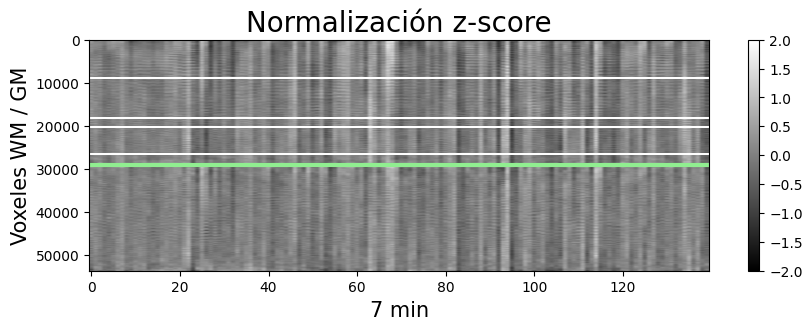

In [12]:

# -------- GRÁFICO --------
plt.figure(figsize=(10,3))
plt.imshow(BoldMatrix_z, cmap='gray', aspect='auto', vmin=-2, vmax=2)
plt.colorbar()
plt.title("Normalización z-score", fontsize=20)
plt.xlabel("7 min", fontsize=15)
plt.ylabel("Voxeles WM / GM", fontsize=15)

# Línea horizontal en la cantidad de filas de nda_bold_signals_reg_gm
plt.axhline(y=greylim, color='lightgreen', linewidth=3)

#### Voy a usar el metodo de Welch para calcular la densidad espectral de potencia de cada señal (PSD) y luego obtener el valor del ancho de banda

In [13]:

# Procesar todas las señales
bandwidths = []
for signal in BoldMatrix_z:
    freqs, psd = sig.welch(signal, fs=fs_bold, window='hann', nperseg=None, noverlap=None, scaling='density')
    _, freq_final = get_bandwidth_to_percent(freqs, psd, H_percent)
    bandwidths.append(freq_final)
    
bandwidths = np.array(bandwidths)

# Separar resultados
bandwidths_gray = bandwidths[:greylim]
bandwidths_white = bandwidths[greylim:]


c:\Users\greta\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\signal\_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 140, using nperseg = 140
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


#### Grafico los resultados en un histograma para comparar

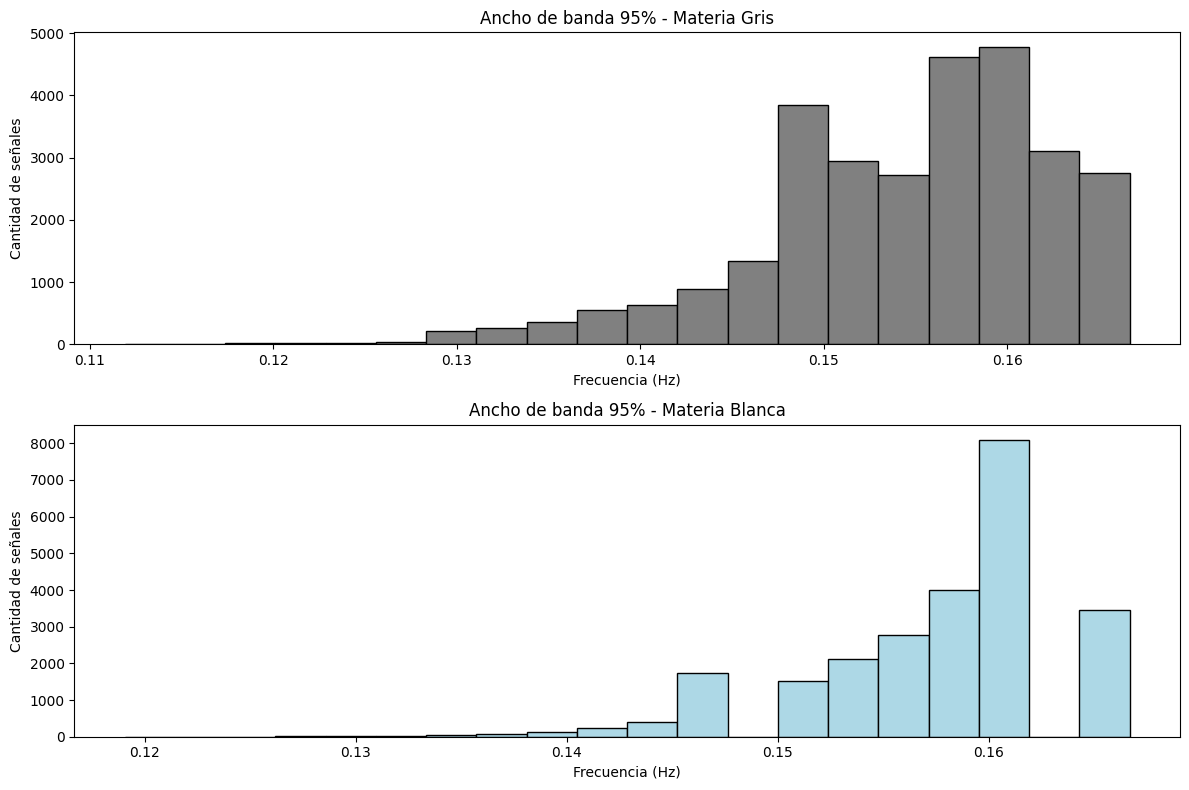

In [14]:


# Graficar histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2,1, 1)
plt.hist(bandwidths_gray, bins=20, color='gray', edgecolor='black')
plt.title('Ancho de banda 95% - Materia Gris')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Cantidad de señales')

plt.subplot(2,1, 2)
plt.hist(bandwidths_white, bins=20, color='lightblue', edgecolor='black')
plt.title('Ancho de banda 95% - Materia Blanca')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Cantidad de señales')

plt.tight_layout()
plt.show()

#### Calculo de la media y la mediana

In [15]:

# Calcular media y mediana para la materia gris
mean_gray = np.mean(bandwidths_gray)
median_gray = np.median(bandwidths_gray)

# Calcular media y mediana para la materia blanca
mean_white = np.mean(bandwidths_white)
median_white = np.median(bandwidths_white)

# Imprimir los resultados
print(f"Media del ancho de banda para la materia gris: {mean_gray} Hz")
print(f"Mediana del ancho de banda para la materia gris: {median_gray} Hz")

print(f"Media del ancho de banda para la materia blanca: {mean_white} Hz")
print(f"Mediana del ancho de banda para la materia blanca: {median_white} Hz")

Media del ancho de banda para la materia gris: 0.15445966290296187 Hz
Mediana del ancho de banda para la materia gris: 0.15714285714285717 Hz
Media del ancho de banda para la materia blanca: 0.15680887827165932 Hz
Mediana del ancho de banda para la materia blanca: 0.15714285714285717 Hz


#### La diferencia no es representativa